In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%load_ext tensorboard

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [4]:
from PIL import Image
from IPython.display import display

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

from build_model_classifier import build_model_classifier_1, build_model_classifier_2, build_model_classifier_3
from load_image import load_image
from get_frames import get_frames
from load_models import load_models
from get_labels import get_windows_original, get_windows_encoded
from assemble_image import assemble_image

In [5]:
#gpu check
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
#load data
stride_step = 50
unit_numb = 30
folder = 'classify_data'

file_name = f'save_data/{folder}/data_{stride_step}_{unit_numb}_6106.pkl'
with open(file_name, 'rb') as f:
    labels_all,windows_data_encoded_all = pickle.load(f)

In [7]:
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(
    windows_data_encoded_all, 
    labels_all, 
    test_size=test_size, 
    random_state=42
)

In [8]:
print(f'Original X shape: {windows_data_encoded_all.shape}')
print(f'Original y shape: {labels_all.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


Original X shape: (5313, 12, 30)
Original y shape: (5313,)
X_train shape: (4781, 12, 30)
y_train shape: (4781,)
X_test shape: (532, 12, 30)
y_test shape: (532,)


In [10]:
input_shape = windows_data_encoded_all.shape[1:]

settings_dict = {
    'input_shape':input_shape,
    'conv_blocks_list':[8,16],
    'dense_blocs_list':[100,100],
    'labels_nmb':4,
    'stride_step':stride_step,
    'unit_numb':unit_numb,
}

optimizer = 'adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model = model = build_model_classifier_3(settings_dict)
model.summary()
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 30)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 8)             728       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 6, 8)              0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 16)             400       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 16)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 48)                0   

In [11]:
batch_size = 2
epochs = 500
validation_split = 0.1
patience_lr = 2
patience_early_stop = 4

#Stop training when no improvement
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                                  patience=patience_early_stop, 
                                                  restore_best_weights=True)
#Reduce learning rate when a metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=patience_lr)
callbacks = [early_stopping, reduce_lr]

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=callbacks,
)

Epoch 1/500


I0000 00:00:1718125533.768479   98151 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2151/2151 [==============================] - 7s 2ms/step - loss: 0.4408 - accuracy: 0.8212 - val_loss: 0.2062 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 2/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.1929 - accuracy: 0.9258 - val_loss: 0.2366 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 3/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.1631 - accuracy: 0.9375 - val_loss: 0.1302 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 4/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.1499 - accuracy: 0.9437 - val_loss: 0.1593 - val_accuracy: 0.9311 - lr: 0.0010
Epoch 5/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.1264 - accuracy: 0.9510 - val_loss: 0.1110 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 6/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.1098 - accuracy: 0.9612 - val_loss: 0.1070 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 7/500
2151/2151 [==============================] - 4s 2ms/

Epoch 52/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-06
Epoch 53/500
2151/2151 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-07
Epoch 54/500
2151/2151 [==============================] - 5s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-07
Epoch 55/500
2151/2151 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-08
Epoch 56/500
2151/2151 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-08
Epoch 57/500
2151/2151 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0546 - val_accuracy: 0.9854 - lr: 1.0000e-09
Epoch 58/500
2151/2151

In [14]:
#save model and settings
settings_dict['batch_size'] = batch_size
settings_dict['validation_split'] = validation_split

#save settings to json
model_name = f'model_class_str_{stride_step}_un_{unit_numb}'

file_settings_name = f'{model_name}_settings.json'
folder = f'stride_{stride_step}/classify'  
model_path = f'saved_models/{folder}'
#create a folder if doesn't exist
os.makedirs(model_path, exist_ok=True)
with open(f'{model_path}/{file_settings_name}', 'w') as f:
    json.dump(settings_dict, f)

#save_model weights
model.save_weights(f'{model_path}/{model_name}/{model_name}') 

In [12]:
#conv model
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

150/150 - 0s - loss: 0.0077 - accuracy: 0.9981 - 317ms/epoch - 2ms/step
17/17 - 0s - loss: 0.0492 - accuracy: 0.9887 - 112ms/epoch - 7ms/step

Train accuracy: 0.9981175661087036
Test accuracy: 0.9887217879295349


Text(0.5, 1.0, 'Training and Validation Loss')

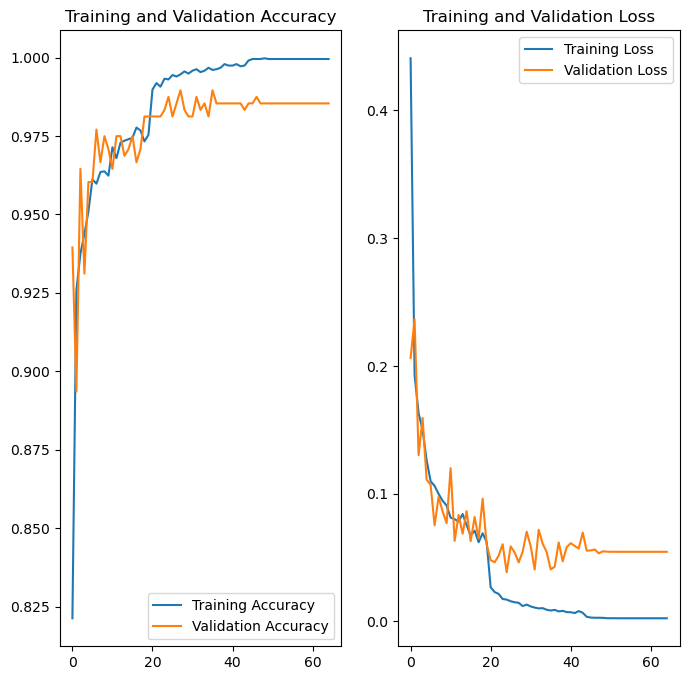

In [13]:
#conv 50 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


Text(0.5, 1.0, 'Training and Validation Loss')

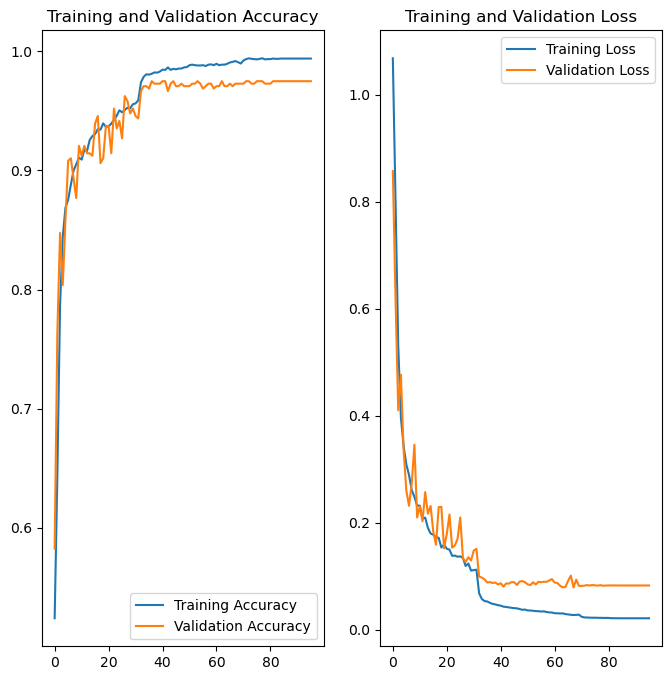

In [22]:
#conv 50 5
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [15]:
#load data image list
test_size = 0.1
norm_factor=1
dtype = 'uint8'

filename = f'save_data/e_d_test_all_str_50_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'

#load data
with open(filename, 'rb') as f:
    image_list,frames_data = pickle.load(f)
    
del frames_data

#image list
print('Image list:')
print('\n'.join([f'{i}: {image}' for i, image in enumerate(image_list)]))

Image list:
0: Fold21.png
1: Pucker3.png
2: Fold3.png
3: Pucker23.png
4: Pucker16.png
5: Twist31.png
6: Pucker7.png
7: Pucker26.png
8: Pucker24.png


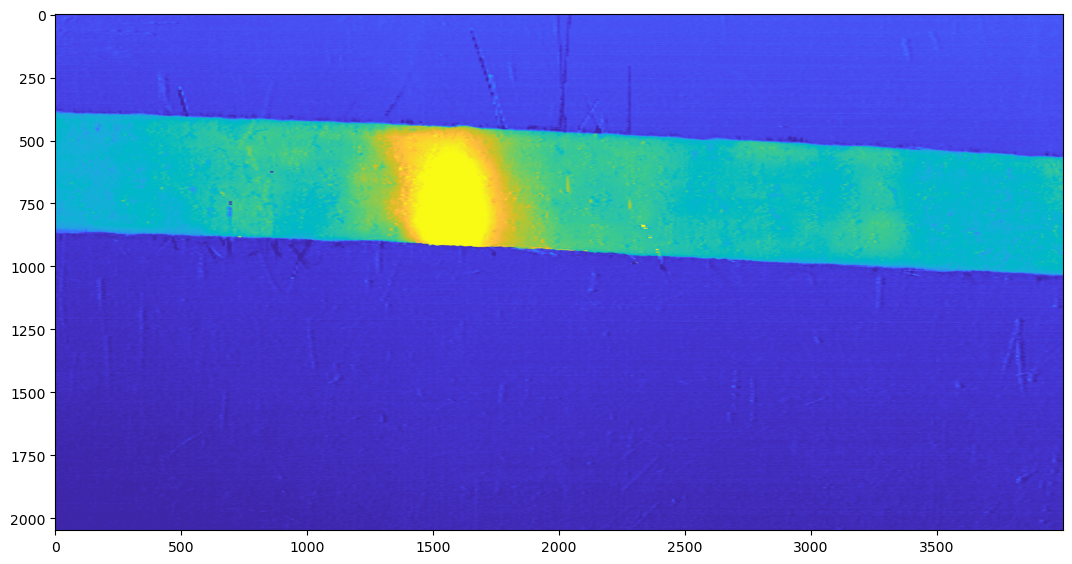

In [29]:
filename = 'Twist10.png'
filename = image_list[6]
stride_step = 50

image_data = load_image(filename)
image_data_frames = get_frames(image_data, stride_step, ifPrint = False)
plt.figure(figsize=(13,7))
plt.imshow(image_data)


In [17]:


window_size = 6
window_size_predicted = 1
overlap = 0
repeat_prediction = 6
stateful = False
lstm_type = 'win'

lstm_pars_dict = {
    'window_size':window_size,
    'window_size_predicted':window_size_predicted,
    'overlap':overlap,
    'repeat_prediction':repeat_prediction,
    'stateful':stateful,
    'lstm_type':lstm_type
}

padding_dict = {
    'ifPadding':True,
    'max_window_size':12,        
}

models_dict = load_models(unit_numb, stride_step, lstm_pars_dict)

#prob model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

model_lstm_win_6_1_ovrp_0_un_30_c_60


In [30]:
window_size_total = window_size + (window_size_predicted-overlap)*repeat_prediction

windows_data = get_windows_original(image_data_frames, stride_step, window_size_total, padding_dict)
windows_data_encoded = get_windows_encoded(windows_data, models_dict['model_encoder'])

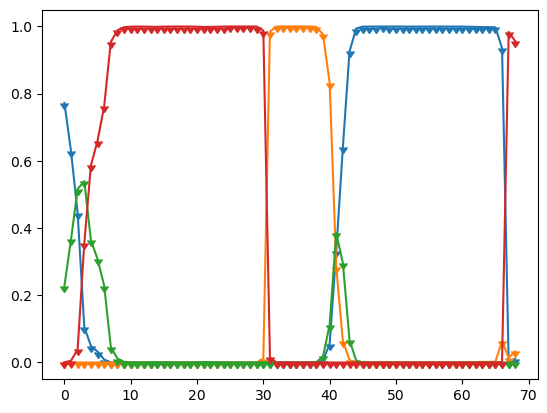

In [31]:
plt.plot(range(probabilities.shape[0]), probabilities[:,0],marker=11)

plt.plot(range(probabilities.shape[0]), probabilities[:,1],marker=11)
plt.plot(range(probabilities.shape[0]), probabilities[:,2],marker=11)
plt.plot(range(probabilities.shape[0]), probabilities[:,3],marker=11)

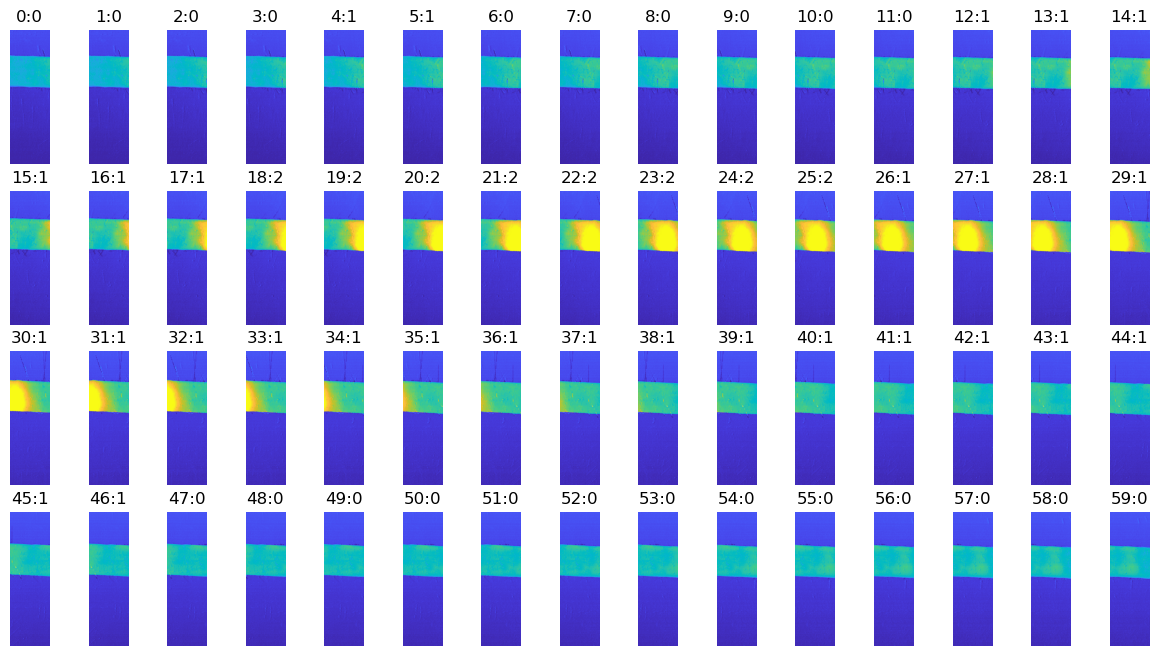

In [31]:
probabilities = probability_model.predict(windows_data_encoded, verbose=0)
labels = np.argmax(probabilities, axis=1)

numb_cols = 15
numb_rows = windows_data.shape[0]//numb_cols

fig, axes = plt.subplots(numb_rows, numb_cols, figsize=(15,2*numb_rows))
fig.subplots_adjust(hspace=0.2, wspace=0.25)

for i, window in enumerate(windows_data[:numb_cols*numb_rows]):
    ii = i//numb_cols
    jj = i%numb_cols
    ax = axes[ii, jj]
    ax.imshow(assemble_image(window))
    label = labels[i]
    #label = 1
    ax.set_title(f'{i}:{label}')
    ax.axis('off')